In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bill_authentication.csv')

In [4]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [11]:
df.Class.unique()

array([0, 1])

In [12]:
from sklearn.model_selection import train_test_split

In [18]:
df.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [19]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [20]:
X = df[['Variance', 'Skewness', 'Curtosis']]

In [21]:
Y = df[['Class']]

In [22]:
from sklearn.svm import SVC

In [23]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)

In [24]:
suppvect = SVC(kernel = 'linear')

In [25]:
suppvect.fit(train_x,train_y)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
pred = suppvect.predict(test_x)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
print(classification_report(pred,test_y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       151
          1       1.00      1.00      1.00       124

avg / total       1.00      1.00      1.00       275



In [29]:
print(confusion_matrix(test_y,pred))

[[151   0]
 [  0 124]]


In [30]:
import seaborn as sn

In [33]:
cm = confusion_matrix(pred,test_y)

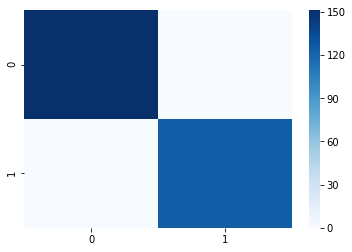

In [35]:
sn.heatmap(cm,cmap = 'Blues')